<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Bioinformatics/blob/master/Baseline_random_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.4.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CuArrays"
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

In [ ]:
versioninfo()

Julia Version 1.4.2
Commit 44fa15b150* (2020-05-23 18:35 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 2


In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("PyPlot")
Pkg.add("CurveFit")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
  Installed Mocking ────── v0.7.1
  Installed XML2_jll ───── v2.9.10+3
  Installed Libiconv_jll ─ v1.16.0+7
  Installed CurveFit ───── v0.3.5
  Installed EzXML ──────── v1.1.0
  Installed Intervals ──── v1.5.0
  Installed Polynomials ── v2.0.0
  Installed TimeZones ──── v1.5.3
######################################################################### 100.0%
######################################################################### 100.0%
   Updating `~/.julia

In [ ]:
n=100 # length of read
l=1e7/n # no. of reads
l=Int64(l) # length of genome: 1e7
x=rand(1:1e7,l);  # Using random the starting positions of reads of length 100 are simulated and stored in an array

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260


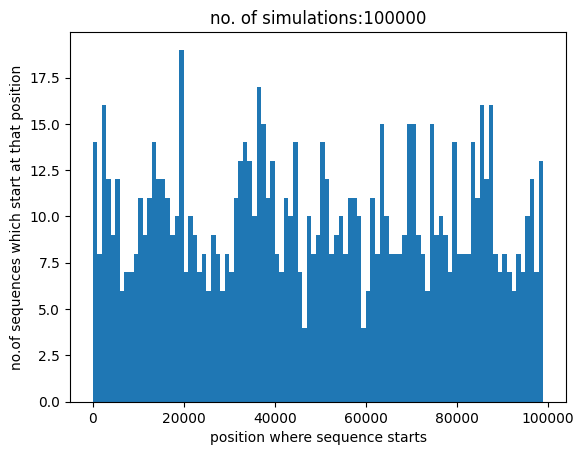

PyObject Text(0.5, 1.0, 'no. of simulations:100000')

In [ ]:
using PyPlot 
fig,ax = plt.subplots(1,1)
ax.hist(x,bins=1:1000:1e5)
plt.xlabel("position where sequence starts")
plt.ylabel("no.of sequences which start at that position")
plt.title("no. of simulations:"*string(l))

### The algorithm for previous plots seems to be difficult for two coverages and above , so in the next algorithm we simulate the starting position of a read and add 1.0 to next 100 positions as well. so the final array which we obtain we will have no. of coverages above a particular location. The array will look like  [1, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1] , by visual inspection for coverage 1 we have 2 regions of length 1 and 2. For coverage 2 the lengths will be 1 and 4. For coverage 3 the lengths will be 3 alone. The below code just finds the length of these regions and plots are plotted.

In [ ]:
l=Int32(1e7)
n=100
s=Int32(4*l/n)
a=zeros(Int32,l)
for i in 1:s
    j=rand(1:l-100)
    a[j]+=1
    a[j+100] -= 1
end
# integrating the derivative array
for pos in 2:l
  a[pos]=a[pos]+a[pos-1]
end

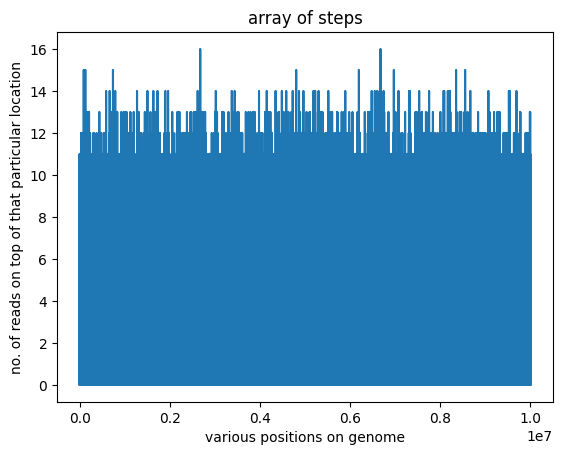

PyObject Text(24.000000000000014, 0.5, 'no. of reads on top of that particular location')

In [ ]:
plt.plot(a)
plt.title("array of steps")
plt.xlabel("various positions on genome")
plt.ylabel("no. of reads on top of that particular location")

single function to calculate all lengths for various overlaps

In [ ]:
function heights(a)
    length_dist = Dict{Int, Vector{Int}}()
    d=1
    h=a[1]
    for i in 2:l
      if a[i]==h
          d+=1
      else
          if d>0
              push!(get!(length_dist, h, Int[]), d)
          d=1
          h=a[i]
          end
      end
    end
  return length_dist
  end

heights (generic function with 1 method)

In [ ]:
heights(a)

Dict{Int64,Array{Int64,1}} with 19 entries:
  18 => [7]
  2  => [29, 15, 8, 3, 2, 9, 65, 13, 8, 2  …  40, 1, 10, 31, 26, 2, 10, 28, 25,…
  16 => [20, 2, 1, 3, 8]
  11 => [1, 11, 22, 9, 7, 21, 6, 3, 12, 2  …  6, 1, 1, 13, 1, 8, 3, 3, 5, 6]
  0  => [131, 54, 9, 67, 6, 27, 16, 41, 39, 67  …  67, 40, 19, 10, 3, 6, 3, 27,…
  7  => [47, 4, 5, 6, 8, 14, 8, 9, 3, 8  …  6, 2, 4, 27, 2, 12, 13, 7, 5, 44]
  9  => [1, 10, 3, 2, 15, 2, 3, 13, 10, 7  …  1, 4, 1, 4, 7, 1, 6, 4, 16, 1]
  10 => [8, 12, 1, 17, 5, 2, 6, 4, 6, 14  …  4, 14, 1, 10, 13, 9, 1, 2, 1, 1]
  17 => [6, 2]
  8  => [8, 23, 15, 25, 2, 1, 4, 3, 19, 1  …  29, 2, 1, 3, 5, 5, 19, 16, 29, 2]
  6  => [13, 8, 8, 4, 2, 16, 3, 8, 1, 6  …  22, 3, 8, 13, 17, 22, 7, 12, 2, 1]
  4  => [13, 1, 10, 23, 1, 1, 31, 8, 39, 15  …  10, 5, 2, 23, 3, 3, 39, 1, 7, 7]
  3  => [22, 4, 10, 13, 6, 22, 2, 25, 6, 4  …  34, 13, 12, 4, 10, 16, 6, 5, 18,…
  5  => [4, 3, 14, 8, 17, 3, 20, 7, 30, 1  …  9, 5, 4, 4, 3, 2, 19, 5, 7, 7]
  13 => [2, 2, 17, 1, 8, 2, 7, 4, 

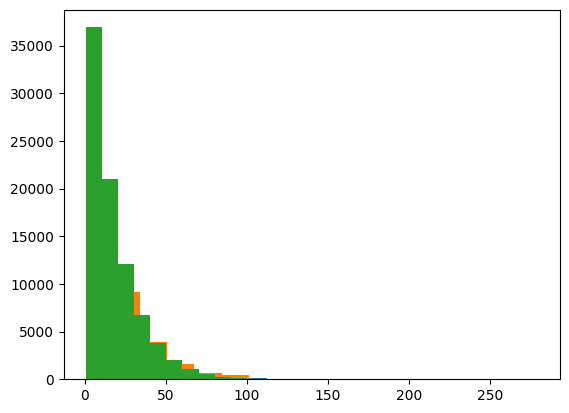

([36913.0, 21016.0, 12102.0, 6689.0, 3774.0, 2036.0, 1114.0, 548.0, 258.0, 111.0], [1.0, 10.9, 20.8, 30.700000000000003, 40.6, 50.5, 60.400000000000006, 70.3, 80.2, 90.10000000000001, 100.0], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7fb27f37f450>, PyObject <matplotlib.patches.Rectangle object at 0x7fb27f3c4d10>, PyObject <matplotlib.patches.Rectangle object at 0x7fb27f37ff50>, PyObject <matplotlib.patches.Rectangle object at 0x7fb27f37ff90>, PyObject <matplotlib.patches.Rectangle object at 0x7fb27f386350>, PyObject <matplotlib.patches.Rectangle object at 0x7fb27f386710>, PyObject <matplotlib.patches.Rectangle object at 0x7fb27f386e90>, PyObject <matplotlib.patches.Rectangle object at 0x7fb27f386ed0>, PyObject <matplotlib.patches.Rectangle object at 0x7fb27f386990>, PyObject <matplotlib.patches.Rectangle object at 0x7fb27f386d90>])

In [ ]:
fig,ax = plt.subplots(1,1)
h0=ax.hist(heights(a)[0])
h1=ax.hist(heights(a)[1])
h2=ax.hist(heights(a)[2])

In [ ]:
using CurveFit

┌ Info: Precompiling CurveFit [5a033b19-8c74-5913-a970-47c3779ef25c]
└ @ Base loading.jl:1260


In [ ]:
length(h[2][1:10]),length(h[1])

(10, 10)

In [ ]:
fit1=curve_fit(ExpFit,h1[2][1:10],h1[1])
y1=fit.(h1[2][1:10])
fit2=curve_fit(ExpFit,h2[2][1:10],h2[1])
y2=fit.(h2[2][1:10])
fit0=curve_fit(ExpFit,h0[2][1:10],h0[1])
y0=fit.(h0[2][1:10])

10-element Array{Float64,1}:
 34550.10127426807
  5319.299064371041
   818.953968082632
   126.08533450028733
    19.41197209565912
     2.988647824396973
     0.4601292323241135
     0.07084103677618753
     0.010906615226719945
     0.0016791715807257185

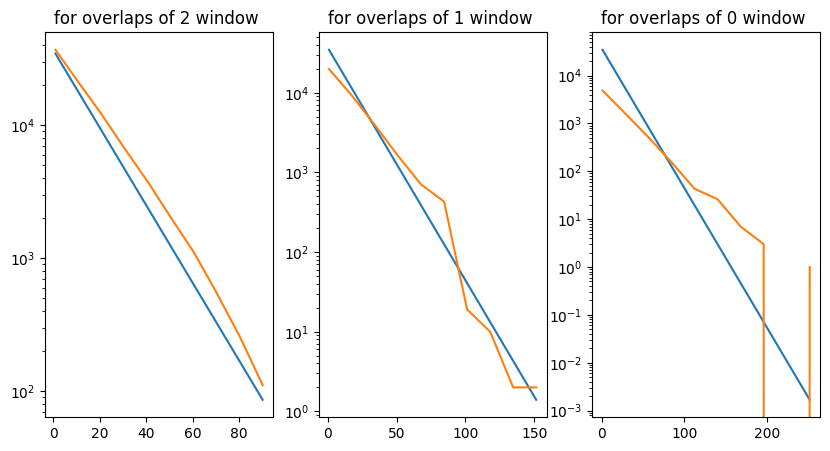

In [ ]:
fig,(axs1,axs2,axs0)=plt.subplots(1,3,figsize=(10,5))
axs2.plot(h1[2][1:10],y1,label="least squares fit")
axs2.plot(h1[2][1:10],h1[1],label="simulation")
axs2.set_title("for overlaps of 1 window ")
axs2.set_yscale("log")
axs1.plot(h2[2][1:10],y2,label="least squares fit")
axs1.plot(h2[2][1:10],h2[1],label="simulation")
axs1.set_title("for overlaps of 2 window ")
axs1.set_yscale("log")
axs0.plot(h0[2][1:10],y0,label="least squares fit")
axs0.plot(h0[2][1:10],h0[1],label="simulation")
axs0.set_title("for overlaps of 0 window ")
axs0.set_yscale("log")
plt.show()

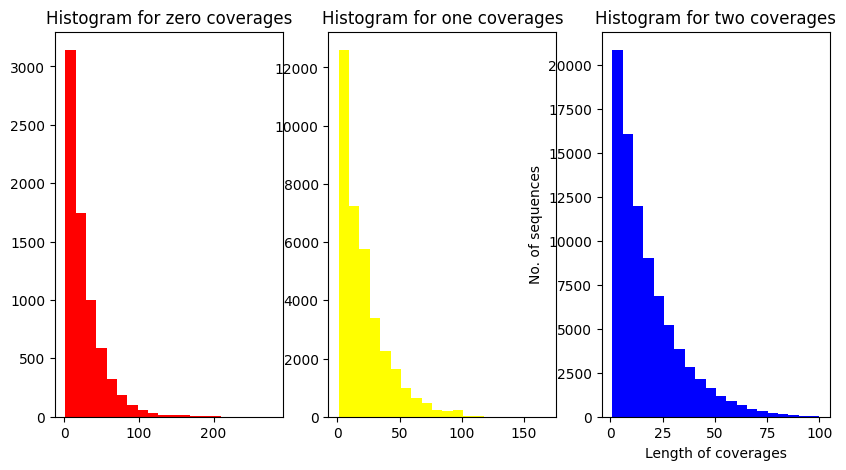

PyObject Text(0.5, 1.0, 'Histogram for two coverages')

In [ ]:
fig,(axs1,axs2,axs3)=plt.subplots(1,3,figsize=(10,5))
axs1.hist(heights(a)[0],bins=20,color="red")
axs2.hist(heights(a)[1],bins=20,color="yellow")
axs3.hist(heights(a)[2],bins=20,color="blue")
plt.xlabel("Length of coverages")
plt.ylabel("No. of sequences")
axs1.set_title("Histogram for zero coverages")
axs2.set_title("Histogram for one coverages")
axs3.set_title("Histogram for two coverages")